![](source/bike.jpeg)

# kaggle共享单车数据可视化分析

**背景**：kaggle网站共享单车项目提供了美国某城市的共享单车2011年到2012年的数据集，该数据包括了租车日期，租车季节，租车气温，租车空气湿度等数据。

**原项目目标**通过历史租车数据并结合天气数据来预测租车需求

**本次目标**：对数据进行清洗，计算描述性统计数据，并实现数据的基本可视化（注：不要求用机器学习模型）



### 1.理解数据

In [4]:
#先导入各种包
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set(style="white")#设置主题，
plt.style.use('seaborn-white')

In [5]:
#查看数据大小
train=pd.read_csv("./train.csv")
test=pd.read_csv("./test.csv")
print('训练数据集：',train.shape,'测试数据集:',test.shape)

训练数据集： (10886, 12) 测试数据集: (6493, 9)


In [6]:
#查看数据情况
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

字段说明：

datetime：时间

season：季节，1=春，2=夏，3=秋，4=冬

holiday：节假日，0：否，1：是

workingday：工作日，0：否，1：是

weather：天气，1:晴天，2:阴天 ，3:小雨或小雪 ，4:恶劣天气（大雨、冰雹、暴风雨或者大雪）

temp：实际温度，摄氏度

atemp：体感温度，摄氏度

humidity：湿度，相对湿度

windspeed：风速

casual：未注册用户租借数量

registered：注册用户租借数量

count：总租借数量

In [7]:
#查看数据总体信息，是否缺数
print('训练集数据信息: ')
train.info()

训练集数据信息: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


数据比较好，都没有缺失，所以后面不需要进行填补

### 数据清洗

时间特征处理

In [8]:
#时间特征处理  "2011-01-20 00:00:00"时间字段的格式是这样的，日期+时间
#创建一个新的dataframe
periodDf=train[['datetime','season','holiday','workingday','count']].copy()
#把datetime列转为时间格式
periodDf['datetime'] = pd.to_datetime(periodDf['datetime'])
#提取时间中的年、月、日、小时、星期
periodDf['year'] = periodDf['datetime'].map(lambda x: x.year)
periodDf['month'] = periodDf['datetime'].map(lambda x: x.month)
periodDf['day']=periodDf['datetime'].map(lambda x: x.day)
periodDf['hour']=periodDf['datetime'].map(lambda x: x.hour)
periodDf['weekday']=periodDf['datetime'].map(lambda x: x.weekday())
#查看处理后的periodDF数据
periodDf.head()

datetime  season  holiday  workingday  count  year  month  day  \
0 2011-01-01 00:00:00       1        0           0     16  2011      1    1   
1 2011-01-01 01:00:00       1        0           0     40  2011      1    1   
2 2011-01-01 02:00:00       1        0           0     32  2011      1    1   
3 2011-01-01 03:00:00       1        0           0     13  2011      1    1   
4 2011-01-01 04:00:00       1        0           0      1  2011      1    1   

   hour  weekday  
0     0        5  
1     1        5  
2     2        5  
3     3        5  
4     4        5

**2011、2012各月份共享单车租借量面积图**

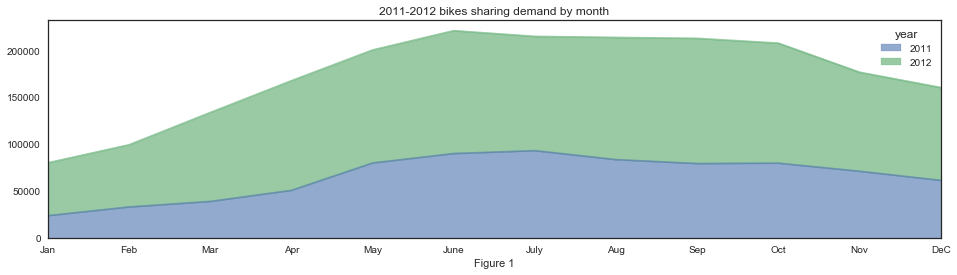

In [9]:
fig, ax1=plt.subplots(figsize=(16,4))
df1 = periodDf.groupby(['year','month']).sum()['count'].unstack(0)
df1.plot(kind='area',ax=ax1,alpha=0.6)
ax1.set_title('2011-2012 bikes sharing demand by month')
ax1.set_xlabel('Figure 1')
ax1.set_xticks(list(range(1,13)))
ax1.set_xticklabels(['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','DeC'])
ax1.set_xlim(1,12)
plt.show()

通过上图分析：我们可以看到2012年共享单车的租借数量比2011年是有提升的，一年中6-10月是租借的高峰期。

### 箱线图

又称箱形图，是利用数据中的五个统计量：最小值、第一四分位数、中位数、第三四分位数与最大值来描述数据的一种方法，它也可以粗略地看出数据是否具有有对称性，分布的分散程度等信息，特别可以用于对几个样本的比较。

![箱线图](source/boxplot.jpg)

**是否节假日箱线图**

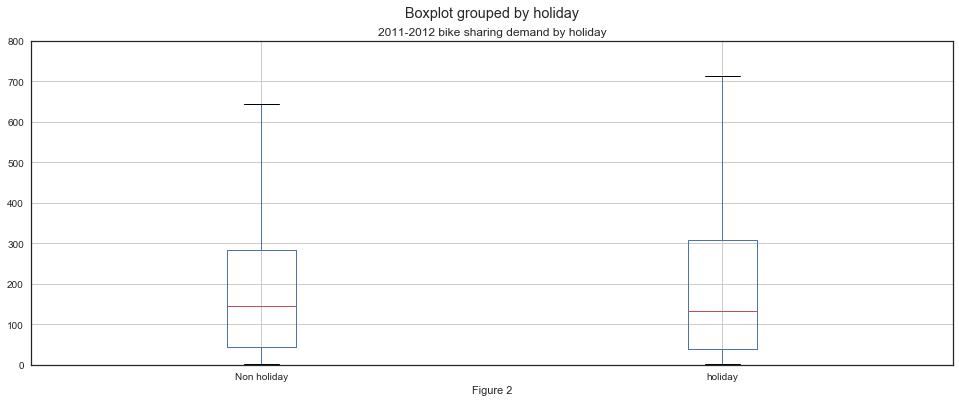

In [19]:
fig2, ax2=plt.subplots(figsize=(16,6))
df2=periodDf[['count','holiday']]
df2.boxplot(by='holiday',ax=ax2)
ax2.set_title('2011-2012 bike sharing demand by holiday')
ax2.set_xlabel('Figure 2')
ax2.set_xticklabels(['Non holiday','holiday'],rotation='horizontal')
ax2.set_ylim(0,800)
plt.show()

**按星期分箱线图**

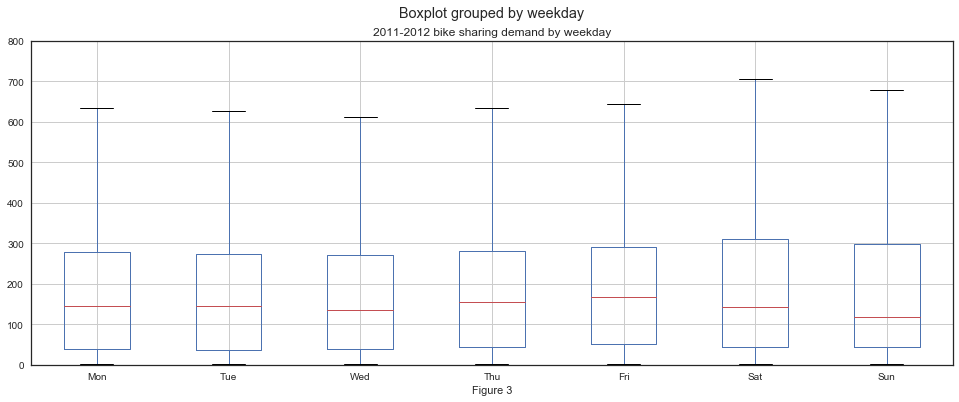

In [20]:
fig3, ax3=plt.subplots(figsize=(16,6))
df2=periodDf[['count','weekday']]
df2.boxplot(by='weekday',ax=ax3)
ax3.set_title('2011-2012 bike sharing demand by weekday')
ax3.set_xlabel('Figure 3')
ax3.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],rotation='horizontal')
ax3.set_ylim(0,800)
plt.show()

由上图可知，工作日租车数量基本持平，周末和工作日相差并不大

**按季节折线图**

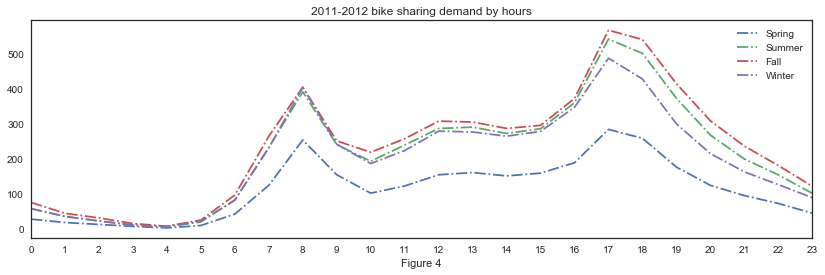

In [33]:
fig4, ax4=plt.subplots(figsize=(14,4))
df4=periodDf.groupby(['hour', 'season']).mean().unstack()['count']
df4.columns=['Spring','Summer','Fall','Winter']
df4.plot(ax=ax4, style='-.')
#df4.plot(ax=ax4, style=['-','--','-.',':'])
ax4.set_title('2011-2012 bike sharing demand by hours')
ax4.set_xlabel('Figure 4')
ax4.set_xticks(list(range(24)))
ax4.set_xticklabels(list(range(24)))
ax4.set_xlim(0,23)
plt.show()

由上图可知，租车数量随季节变化趋势大体是一致的，春天租车最少，秋天最多。早高峰（7-9时）和晚高峰（16-19时）租车数量增加显著

**按工作日折线图**

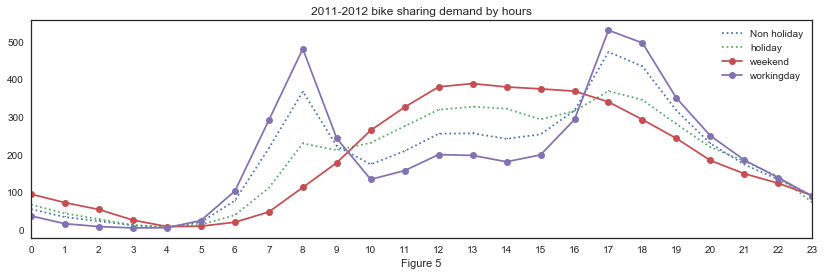

In [22]:
fig5, ax5=plt.subplots(figsize=(14,4))
df5=periodDf.groupby(['hour', 'holiday']).mean().unstack()['count']
df5.columns=['Non holiday','holiday']
df5.plot(ax=ax5, style=':,')
df52=periodDf.groupby(['hour', 'workingday']).mean().unstack()['count']
df52.columns=['weekend','workingday']
df52.plot(ax=ax5, style='-o')
ax5.set_title('2011-2012 bike sharing demand by hours')
ax5.set_xlabel('Figure 5')
ax5.set_xticks(list(range(24)))
ax5.set_xticklabels(list(range(24)))
ax5.set_xlim(0,23)
plt.show()

由上图可知，节假日和非节假日影响不大。工作日和周末用车的时段呈递相反趋势，工作日集中在早晚高峰，周末集中在10-16时。

### 非时间特征处理

In [23]:
#天气、温度、湿度、风速信息统计
climateDf=train[['weather','temp','atemp','humidity','windspeed','count']]
climateDf=pd.concat([climateDf,periodDf['hour']],axis=1)

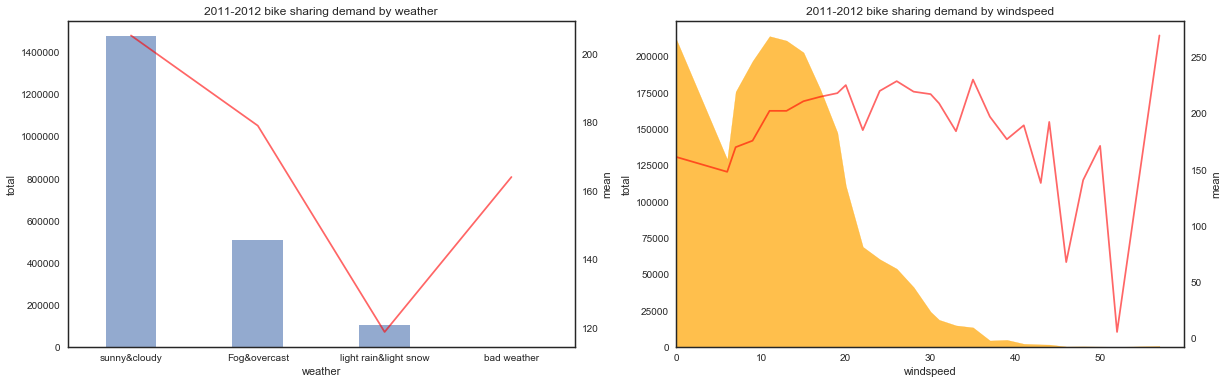

In [86]:
#查看天气和风速对租车数量的影响#查看天气和风速 
fig6,axes6=plt.subplots(1,2,figsize=(20,6))
ax6,ax7 = axes6.ravel()
ax8 = ax7.twinx()

df11=climateDf.groupby('weather').sum()['count']
df12=climateDf.groupby('weather').mean()['count']
df1=pd.concat([df11,df12],axis=1).reset_index()
df1.columns=['weather','sum','mean']
df1['sum'].plot(kind='bar',width=0.4,ax=ax6,alpha=0.6,label='')
df1['mean'].plot(style='r-',alpha=0.6,ax=ax6,secondary_y=True,label='mean')
ax6.set_xlim(-0.5,3.5)
ax6.set_xlabel('weather')
ax6.set_xticks(df1.index)
ax6.set_xticklabels(['sunny&cloudy','Fog&overcast','light rain&light snow','bad weather'], rotation='horizontal')
ax6.set_ylabel('total')
ax6.right_ax.set_ylabel('mean')
ax6.set_title('2011-2012 bike sharing demand by weather')

df21=climateDf.groupby('windspeed').sum()['count']
df22=climateDf.groupby('windspeed').mean()['count']
df2=pd.concat([df21,df22],axis=1).reset_index()
df2.columns=['windspeed','sum','mean']
ax7.stackplot(df2['windspeed'],df2['sum'],alpha=0.7,color='orange')
ax7.set_xlabel('windspeed')
ax7.set_ylabel('total')
ax7.set_xlim(0)
ax7.set_ylim(0)
ax7.set_title('2011-2012 bike sharing demand by windspeed')

ax8.plot(df2['windspeed'],df2['mean'], alpha=0.6,color='red',label='mean')
ax8.set_ylabel('mean')
plt.show()

badweather均值非常高，查看badweather数据后，只有一条记录

In [25]:
train[train['weather']==4]

datetime  season  holiday  workingday  weather  temp   atemp  \
5631  2012-01-09 18:00:00       1        0           1        4   8.2  11.365   

      humidity  windspeed  casual  registered  count  
5631        86     6.0032       6         158    164

**温度-租借量散点图、湿度-租借量散点图**

[内置colormap](https://matplotlib.org/gallery/color/colormap_reference.html)

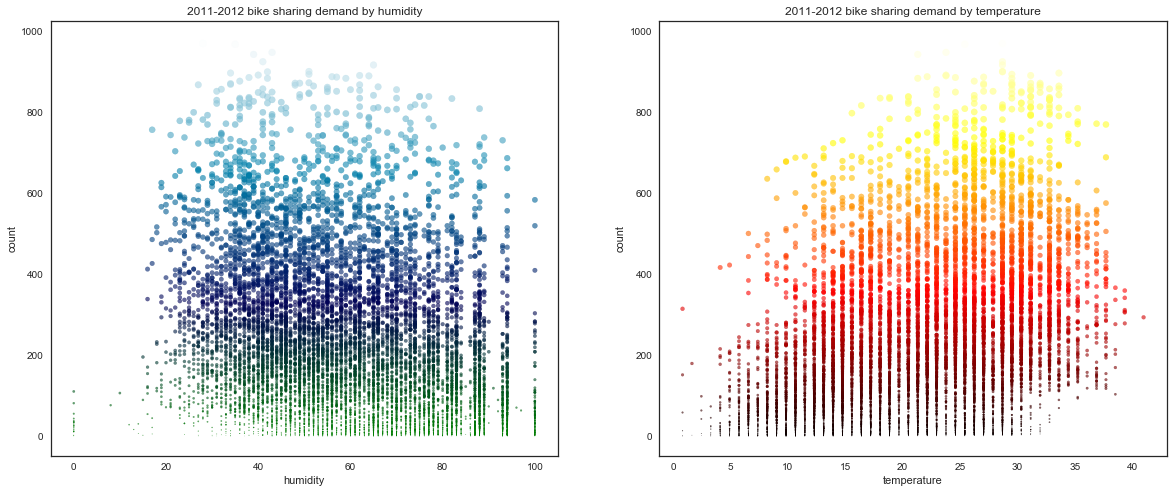

In [27]:
#查看湿度、温度对租车数量的影响
fig,axes=plt.subplots(1,2,figsize=(20,8))
ax1,ax2 = axes.ravel()

df1=climateDf[['humidity','count']]
ax1.scatter(df1['humidity'],df1['count'],s=df1['count']/5, c=df1['count'], marker='.',alpha=0.6,cmap=plt.cm.ocean)
ax1.set_title('2011-2012 bike sharing demand by humidity')
ax1.set_xlabel('humidity')
ax1.set_ylabel('count')

df2=climateDf[['temp','count']]
ax2.scatter(df2['temp'],df2['count'],s=df1['count']/5, c=df1['count'], marker='.',alpha=0.6,cmap=plt.cm.hot)
ax2.set_title('2011-2012 bike sharing demand by temperature')
ax2.set_xlabel('temperature')
ax2.set_ylabel('count')
plt.show()